# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the northern hemisphere tends to be warmer this time of year than the southern hemisphere. 
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that cities nearest to the equator are likely to have greater than 50% humidity.
* There is no strong relationship between latitude and wind speed. However, the windiest cities found this time of year are the southernmost.


In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)

input_file = "Resources/cities.csv"
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

# List for holding lat_lngs and cities
lat_lngs = []
inputcities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in inputcities:
        inputcities.append(city)

# Print the city count to confirm sufficient count
len(inputcities)

In [11]:
df_city = pd.read_csv(input_file)
df_city.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,jacareacanga,0,BR,1528902000,62,-6.22,-57.76,89.60,6.93
1,1,kaitangata,100,NZ,1528905304,94,-46.28,169.85,42.61,5.64
2,2,goulburn,20,AU,1528905078,91,-34.75,149.72,44.32,10.11
3,3,lata,76,IN,1528905305,89,30.78,78.62,59.89,0.94
4,4,chokurdakh,0,RU,1528905306,88,70.62,147.90,32.17,2.95


# base_url = "http://api.openweathermap.org/data/2.5/weather?"
cities = []
df_city = pd.DataFrame({'City': inputcities})

df_city['Cloudiness'] = ''
df_city['Country'] = ''
df_city['Date'] = ''
df_city['Humidity'] = ''
df_city['Lat'] = ''
df_city['Lng'] = ''
df_city['Max Temp'] = ''
df_city['Wind Speed'] = ''

for index,row in df_city.iterrows():
    city = row['City']
    qurl = f'{base_url}appid={api_key}&q={city}'
    resp = requests.get(qurl).json()
        
    try:
        print(f"Processing Record {inputcities.index(city)} of {len(inputcities)} | {city}")
        
        df_city.loc[index, 'City'] = city
        df_city.loc[index, 'Cloudiness'] = resp['clouds']['all']
        df_city.loc[index, 'Country'] = resp['sys']['country']
        df_city.loc[index, 'Date'] = resp['dt']
        df_city.loc[index, 'Humidity'] = resp['main']['humidity']
        df_city.loc[index, 'Lat'] = resp['coord']['lat']
        df_city.loc[index, 'Lng'] = resp['coord']['lon']
        df_city.loc[index, 'Max Temp'] = resp['main']['temp_max']
        df_city.loc[index, 'Wind Speed'] = resp['wind']['speed']

    except (KeyError, IndexError):
        print('City not found, skipped')
        df_city = df_city.drop(inputcities.index(city))

In [12]:
df_city.count()

City_ID       547
City          547
Cloudiness    547
Country       545
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [13]:
df_city.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,jacareacanga,0,BR,1528902000,62,-6.22,-57.76,89.60,6.93
1,1,kaitangata,100,NZ,1528905304,94,-46.28,169.85,42.61,5.64
2,2,goulburn,20,AU,1528905078,91,-34.75,149.72,44.32,10.11
3,3,lata,76,IN,1528905305,89,30.78,78.62,59.89,0.94
4,4,chokurdakh,0,RU,1528905306,88,70.62,147.90,32.17,2.95


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
#df_city.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Maximum Temperature [K]')

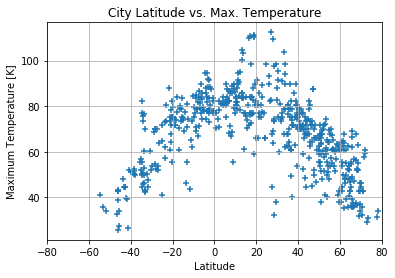

In [16]:
plt.scatter(df_city['Lat'],df_city['Max Temp'],marker='+')
plt.grid()
plt.title('City Latitude vs. Max. Temperature')
plt.xlabel('Latitude')
plt.xlim(-80,80)
plt.ylabel('Maximum Temperature [K]')
#plt.savefig('output_data/TempVsLat.png')

#### Latitude vs. Humidity Plot

(0, 100)

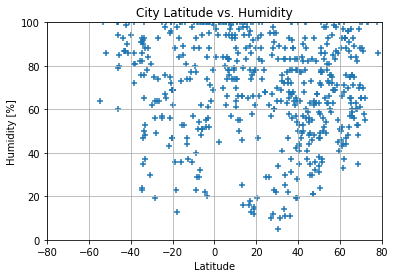

In [17]:
plt.scatter(df_city['Lat'],df_city['Humidity'],marker='+')
plt.grid()
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.xlim(-80,80)
plt.ylabel('Humidity [%]')
plt.ylim(0,100)
#plt.savefig('output_data/HumidityVsLat.png')

##### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness [%]')

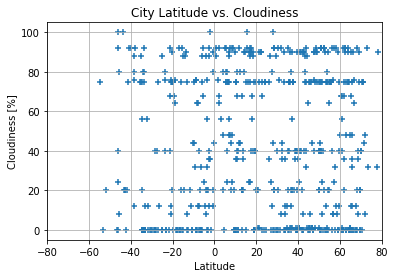

In [18]:
plt.scatter(df_city['Lat'],df_city['Cloudiness'],marker='+')
plt.grid()
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.xlim(-80,80)
plt.ylabel('Cloudiness [%]')
#plt.savefig('output_data/CloudVsLat.png')

#### Latitude vs. Wind Speed Plot

(0, 18)

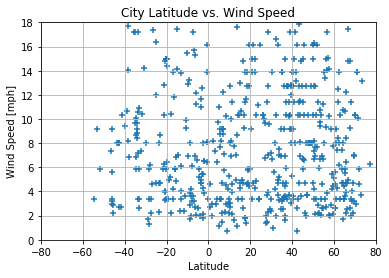

In [19]:
plt.scatter(df_city['Lat'],df_city['Wind Speed'],marker='+')
plt.grid()
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.xlim(-80,80)
plt.ylabel('Wind Speed [mph]')
plt.ylim(0,18)
#plt.savefig('output_data/WindVsLat.png')